In [1]:
# load data
from sklearn import datasets
boston = datasets.load_boston()
print(boston.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [2]:
# summary of data
feature = boston.data
price = boston.target
print('data size = ', feature.shape)
print('target size = ', price.shape)
print('feature attributes: ', boston.feature_names)
print(boston.DESCR)

wn
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of UCI ML hous

In [3]:
# more details of data
import pandas as pd
df_feature = pd.DataFrame(feature, columns = boston.feature_names)
df_target = pd.DataFrame(price, columns =['MEDV'])
df_boston = pd.concat([df_feature, df_target,], axis = 1)

In [4]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Figure size 432x288 with 0 Axes>

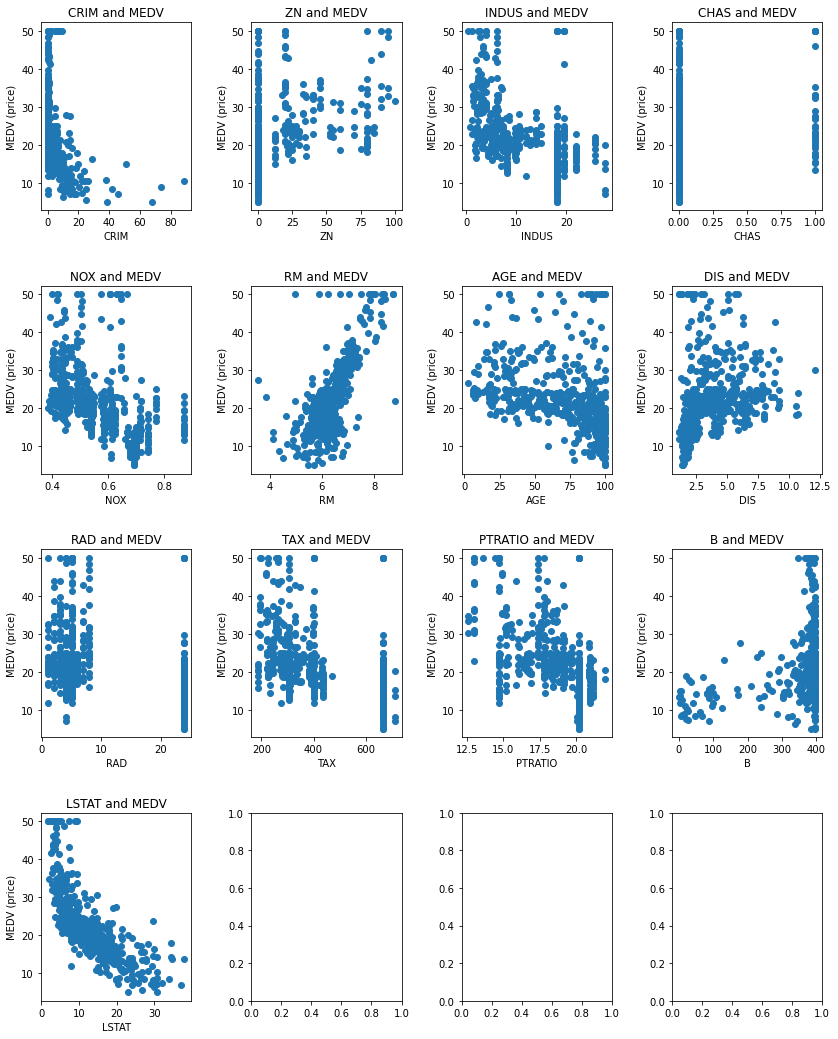

In [6]:
# 2.1 how does each feature relate to the price
import matplotlib.pyplot as plt
plt.figure()
fig,axes = plt.subplots(4, 4, figsize=(14,18))
fig.subplots_adjust(wspace=.4, hspace=.4)
img_index = 0
for i in range(boston.feature_names.size):
    row, col = i // 4, i % 4
    axes[row][col].scatter(feature[:,i], price)
    axes[row][col].set_title(boston.feature_names[i] + ' and MEDV')
    axes[row][col].set_xlabel(boston.feature_names[i])        
    axes[row][col].set_ylabel('MEDV (price)')
plt.show()

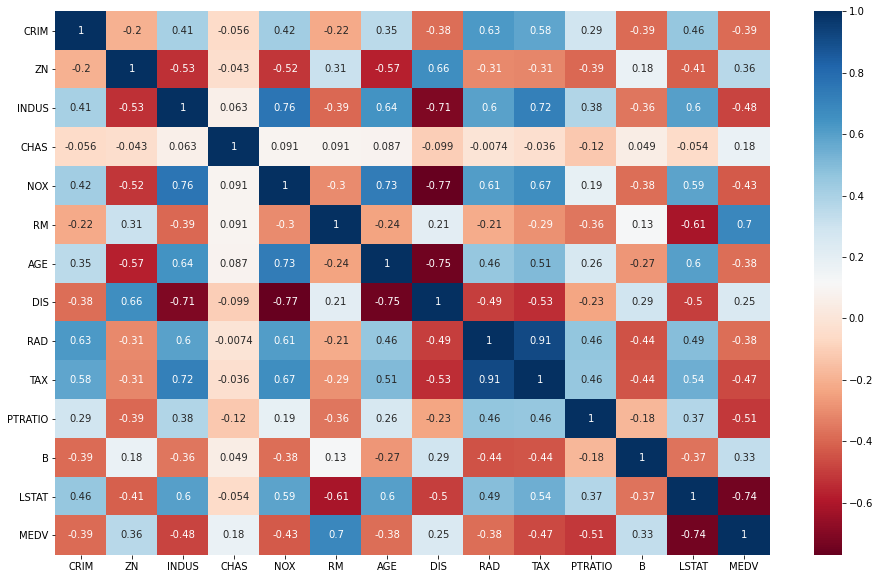

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
# 2.2 correlation matrix
import seaborn as sns
fig, ax = plt.subplots(figsize=(16, 10))
correlation = df_boston.corr()
sns.heatmap(correlation, annot = True, cmap = 'RdBu')
plt.show()
correlation

In [8]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature, price, test_size=0.3, random_state=8)

In [9]:
# 2.3 linear regression and ridge regression
import numpy as np

## https://www.geeksforgeeks.org/solving-linear-regression-in-python/

def least_square(X, y):
    a = np.linalg.inv(np.transpose(X).dot(X))
    b = np.transpose(X).dot(y)
    theta = a@b
    return theta

def ridge_reg(X, y, eta):
    a = np.linalg.inv(np.transpose(X).dot(X) + eta/2)
    b = np.transpose(X).dot(y)
    theta = a@b
    return theta

# apply linear regression
theta = least_square(X_train, y_train)
df_theta = pd.DataFrame(zip(boston.feature_names, theta),columns=['Feature','Coeff'])
print(df_theta)

print('\n')

# apply ridge regression
theta_r = ridge_reg(X_train, y_train, 15.0)
df_theta_r = pd.DataFrame(zip(boston.feature_names, theta_r),columns=['Feature','Coeff'])
print(df_theta_r)

    Feature     Coeff
0      CRIM -0.099324
1        ZN  0.052251
2     INDUS  0.004516
3      CHAS  2.957261
4       NOX  1.127938
5        RM  5.854198
6       AGE -0.014957
7       DIS -0.920844
8       RAD  0.159519
9       TAX -0.008934
10  PTRATIO -0.435674
11        B  0.014905
12    LSTAT -0.474751


    Feature     Coeff
0      CRIM -0.104002
1        ZN  0.052225
2     INDUS  0.037553
3      CHAS  2.689784
4       NOX -5.698645
5        RM  6.144848
6       AGE -0.008247
7       DIS -0.989810
8       RAD  0.163495
9       TAX -0.007848
10  PTRATIO -0.424732
11        B  0.015801
12    LSTAT -0.443902


In [10]:
# 2.4 evaluation
def pred_fn(X, theta):
    pred = X @ theta
    return pred

def root_mean_square_error(pred, y):
    rmse = np.sqrt(np.sum((pred - y)**2) / np.size(y))
    return rmse

RMSE_linear_train = root_mean_square_error(pred_fn(X_train, theta), y_train)
RMSE_linear_test = root_mean_square_error(pred_fn(X_test, theta), y_test)

RMSE_ridge_train = root_mean_square_error(pred_fn(X_train, theta_r), y_train)
RMSE_ridge_test = root_mean_square_error(pred_fn(X_test, theta_r), y_test)

print("--Linear Regression--", "\nRMSE - Training Set: ", RMSE_linear_train)
print("RMSE - Test Set: ", RMSE_linear_test)

print("\n--Ridge Regression--", "\nRMSE - Training Set: ", RMSE_ridge_train)
print("RMSE - Test Set: ", RMSE_ridge_test)

--Linear Regression-- 
RMSE - Training Set:  4.820626531838223
RMSE - Test Set:  5.209217510530871

--Ridge Regression-- 
RMSE - Training Set:  4.841863377556695
RMSE - Test Set:  5.1474164106401945


In [11]:
# 2.5 linear models of top-3 features

# Extract top 3 features from our dataset - i.e. RM (index=5), LSTAT (index=12), and PTRATIO (index=10)
top_3_indices = [5, 10, 12]
X_train = X_train[:, top_3_indices]
X_test = X_test[:, top_3_indices]

# linear regression using top-3 features
theta = least_square(X_train, y_train)

RMSE_linear_train = root_mean_square_error(pred_fn(X_train, theta), y_train)
RMSE_linear_test = root_mean_square_error(pred_fn(X_test, theta), y_test)

print("--Linear Regression--", "\nRMSE - Training Set: ", RMSE_linear_train)
print("RMSE - Test Set: ", RMSE_linear_test)

# ridge regression using top-3 features
theta_r = ridge_reg(X_train, y_train, 15.0)

RMSE_ridge_train = root_mean_square_error(pred_fn(X_train, theta_r), y_train)
RMSE_ridge_test = root_mean_square_error(pred_fn(X_test, theta_r), y_test)

print("\n--Ridge Regression--", "\nRMSE - Training Set: ", RMSE_ridge_train)
print("RMSE - Test Set: ", RMSE_ridge_test)

--Linear Regression-- 
RMSE - Training Set:  5.273361751695365
RMSE - Test Set:  5.494723646664584

--Ridge Regression-- 
RMSE - Training Set:  5.273892798921624
RMSE - Test Set:  5.48798618153452
